In [1]:
from operator import *
import matplotlib.pyplot as plt
import numpy as np
import csv
from datetime import datetime

In [2]:
#Coupled equations for angular momentum using the Inertial Tensor
def t_handle_derivs(I,x):
    I1=I[0]
    I2=I[1]
    I3=I[2]
    w1=x[0]
    w2=x[1]
    w3=x[2]
    dw1 = ((I2-I3)/I1)*w2*w3
    dw2 = ((I3-I1)/I2)*w3*w1
    dw3 = ((I1-I2)/I3)*w1*w2
    return [dw1, dw2, dw3]

In [3]:
# standard forward euler
def forward_euler(f,x,dt,I):
    a = f(I,x)
    b = list(map(mul,a,[dt,dt,dt]))
    x_new = list(map(add, x,b))
    return x_new

In [4]:
# plot angular velocities of each axis
def plot_results(timestamp, w1,w2,w3,T):
    plt.plot(T,w1)
    plt.plot(T,w2)
    plt.plot(T,w3)
    plt.title("Angular Velocity")
    plt.legend(["w1","w2","w3"])
    
    #save graph to file
    plt.savefig(timestamp+"_angular_vel.jpg")
    
    plt.show()

In [5]:
# save angular velocity data to a csv file.
def save_csv(filename, w1, w2, w3):
    outfile = open(filename,'w')
    wtr = csv.writer(outfile)
    
    for i in range(len(w1)):
        wtr.writerow([w1[i],w2[i],w3[i]])
    outfile.close()


In [6]:
# calculate the quaternion product from angular velocity
def quaternion_product(quat ,omega):
    w1 = omega[0]
    w2 = omega[1]
    w3 = omega[2]
    
    q1 = quat[0]
    q2 = quat[1]
    q3 = quat[2]
    q4 = quat[3]
    
    dq1 = -w1*q2 -w2*q3 - w3*q4
    dq2 = w1*q1 + w3*q3 - w2*q4
    dq3 = w2*q1 - w3*q2 + w1*q4
    dq4 = w3*q1 +w2*q2 - w1*q3
    
    return [dq1/2, dq2/2, dq3/2, dq4/2]

In [7]:
# Show a plot of the quaternions
def plot_quaternions(timestamp, T, q0, q1, q2, q3):
    plt.plot(T,q0)
    plt.plot(T,q1)
    plt.plot(T,q2)
    plt.plot(T,q3)
    plt.legend(["q0","q1","q2","q3"])
    plt.title("Quaternion Rotations")
    
    #save graph to file
    plt.savefig(timestamp+"_quaternions.jpg")
    
    plt.show()

In [8]:
# save quaternion data to a csv file.
def save_quat_csv(filename, q0, q1, q2, q3):
    outfile = open(filename,'w')
    wtr = csv.writer(outfile)
    
    for i in range(len(q0)):
        wtr.writerow([q0[i],q1[i],q2[i],q3[i]])
    outfile.close()

In [9]:
# save simulation configuration to a file
def save_config(filename, I, x, t, end):
    with open(filename+"_config.txt", 'w') as f:
        f.write(f"Iertia Tensor: {I}\n")
        f.write(f"Initial Angular Velocity: {x}\n")
        f.write(f"Timestep: {t}\n")
        f.write(f"End Time: {end}\n")
    f.close()

In [10]:
# Take an inertia tensor, starting angular velocity, timestep, and end time and make a simulation
# This simulation has no damping or applied forces besides the initial velocity
def rotation_sim(I, x, t, end):
    # get timestamp for file names
    now = datetime.now()
    current_time = now.strftime("%Y%m%d_%H%M%S")
    
    #save simulation configuration
    save_config(current_time,I,x,t,end)
    
    # set up simulation outputs
    w1_out = []
    w2_out = []
    w3_out = []
    T = np.arange(0,end,t)
    
    #quaternion rotations
    q0_out = []
    q1_out = []
    q2_out = []
    q3_out = []
    
    q = [1,0,0,0] # all zero is an invalid rotation therefore we start with [1,0,0,0]

    #run simulation
    for i in range(len(T)):
        # Integrate the equations of motion
        x = forward_euler(t_handle_derivs, x, t, I)
        w1_out.append(x[0])
        w2_out.append(x[1])
        w3_out.append(x[2])
        
        # calculate the quaternion rotation
        omega = [w1_out[i],w2_out[i],w3_out[i]]
        qdot = quaternion_product(q,omega)
        q_new = np.add(q,np.multiply(qdot,t)) # update quaternion
        q = q_new
    
        q0_out.append(q[0])
        q1_out.append(q[1])
        q2_out.append(q[2])
        q3_out.append(q[3])

    # plot results
    plot_results(current_time, w1_out,w2_out,w3_out,T)
    
    # save results to an output file
    save_csv(current_time+"_angular_vel.csv",w1_out,w2_out,w3_out)
    
    # plot the rotations
    plot_quaternions(current_time ,T, q0_out, q1_out, q2_out, q3_out)
    
    # save the rotations to an external file
    save_quat_csv(current_time+"_quat_rotation.csv",q0_out,q1_out,q2_out,q3_out)

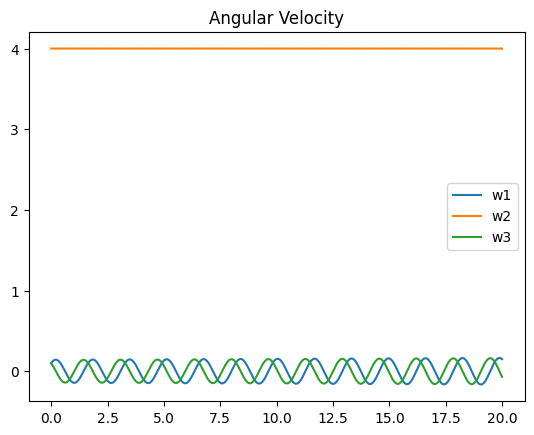

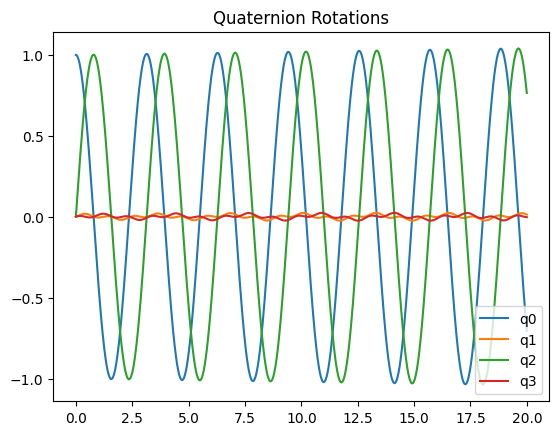

In [11]:
# Largest MOI Axis Rotation
I = [0.299, 0.408, 0.116]  # Inertia Tensor for rigid body
x = [0.1, 4, 0.1]               # initial angular velocity of principle axes
t = 0.001                        # simulation timestep
end = 20                         # simulation end time

rotation_sim(I,x,t,end)

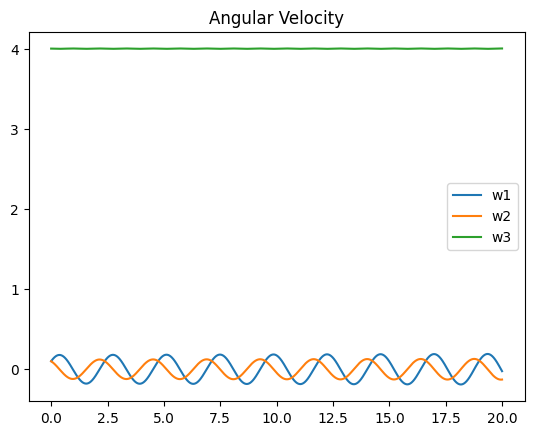

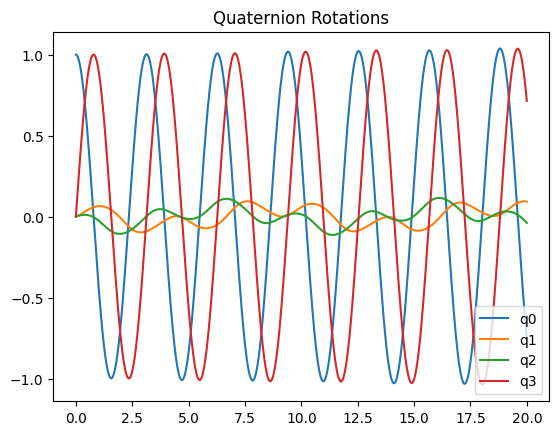

In [12]:
# Smallest MOI Axis Rotation()
I = [0.299, 0.408, 0.116]  # Inertia Tensor for rigid body
x = [0.1, 0.1, 4]               # initial angular velocity of principle axes
t = 0.001                        # simulation timestep
end = 20                         # simulation end time

rotation_sim(I,x,t,end)

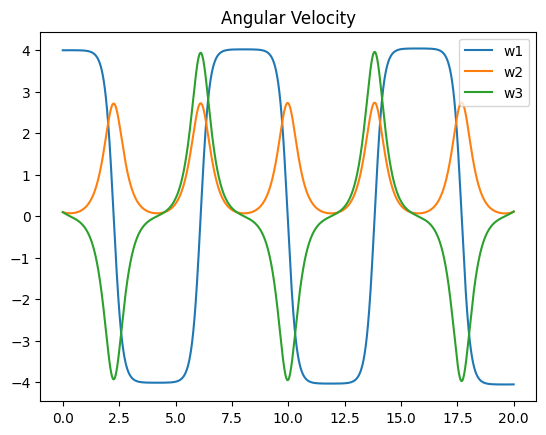

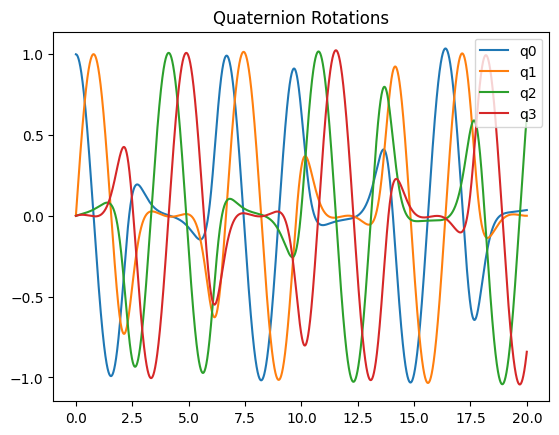

In [13]:
# Intermediate Rotation
I = [0.299, 0.408, 0.116]  # Inertia Tensor for rigid body
x = [4,0.1, 0.1]               # initial angular velocity of principle axes
t = 0.001                        # simulation timestep
end = 20                         # simulation end time

rotation_sim(I,x,t,end)